In [1]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#Carga desde un archivo .csv sin indice y eliminar filas innecesarias
Rio_de_Janeiro = pd.read_csv("Listings Final-Rio de Janeiro.csv", on_bad_lines='skip')
Rio_de_Janeiro

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20240627045056,2024-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates applies for Ne...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Brazil",I am a journalist/writer. Lived in NYC for ...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2,5,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.965990,-43.179400,Entire condo,Entire home/apt,5,1.0,1 bath,2.0,2.0,"[""Smoking allowed"", ""Essentials"", ""Air conditi...",$310.00,5,28,5,5,28,28,5.0,28.0,NaN,t,6,32,51,274,2024-06-28,319,23,1,2010-07-15,2024-06-08,4.71,4.77,4.64,4.84,4.91,4.77,4.67,NaN,f,1,1,0,0,1.88
1,25026,https://www.airbnb.com/rooms/25026,20240627045056,2024-06-28,city scrape,Beautiful Modern Decorated Studio in Copa,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/7c08fa4f-1d7b...,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, Brazil","Hi guys,\n\nViviane is a commercial photograph...",within an hour,100%,82%,t,https://a0.muscache.com/im/pictures/user/315dd...,https://a0.muscache.com/im/pictures/user/315dd...,Copacabana,1,5,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.977350,-43.191050,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Fast wifi \u2013 501 Mbps"", ""Essentials"", ""H...",$203.00,2,60,2,2,60,60,2.0,60.0,NaN,t,24,54,71,241,2024-06-28,291,23,1,2010-06-07,2024-06-02,4.73,4.71,4.79,4.82,4.92,4.84,4.62,NaN,f,1,1,0,0,1.70
2,220377,https://www.airbnb.com/rooms/220377,20240627045056,2024-06-27,city scrape,Suíte Casal (banheiro privativo),The apartment is cozy and well located. The r...,Tijuca is a residential neigbohood in Rio clos...,https://a0.muscache.com/pictures/992d8e44-0ef1...,1142424,https://www.airbnb.com/users/show/1142424,Taciana,2011-09-11,NaN,NaN,within an hour,100%,47%,f,https://a0.muscache.com/im/pictures/user/c24dc...,https://a0.muscache.com/im/pictures/user/c24dc...,Tijuca,3,3,['phone'],t,t,"Rio de Janeiro, Brazil",Tijuca,NaN,-22.928800,-43.240460,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,1.0,"[""Essentials"", ""Air conditioning"", ""Hangers"", ...",$220.00,1,365,1,1,1125,1125,1.0,1125.0,NaN,t,9,29,41,283,2024-06-27,5,1,0,2011-11-08,2024-03-28,5.00,5.00,5.00,5.00,4.80,4.80,5.00,NaN,f,3,0,3,0,0.03
3,35764,https://www.airbnb.com/rooms/

In [13]:
#Convertir la variable price a numerico
Rio_de_Janeiro['price'] = Rio_de_Janeiro['price'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_14752\462934134.py:2: SyntaxWarning: invalid escape sequence '\$'
  Rio_de_Janeiro['price'] = Rio_de_Janeiro['price'].replace('[\$,]', '', regex=True).astype(float)


In [14]:
#Identificar valores nulos por columna
# Ajustar maximo de filas
Valores_Nulos=Rio_de_Janeiro.isnull().sum()
Columnas_Con_Nulos = Valores_Nulos[Valores_Nulos > 0]
Columnas_Con_Nulos

description                      1163
neighborhood_overview           17648
host_location                    6795
host_about                      18113
host_response_time               5785
host_response_rate               5785
host_acceptance_rate             3575
host_is_superhost                 868
host_neighbourhood               5885
neighbourhood                   17648
neighbourhood_group_cleansed    34664
bathrooms                         840
bathrooms_text                     41
bedrooms                          138
beds                              842
price                             972
calendar_updated                34664
has_availability                  337
first_review                     8446
last_review                      8446
review_scores_rating             8446
review_scores_accuracy           8455
review_scores_cleanliness        8455
review_scores_checkin            8455
review_scores_communication      8455
review_scores_location           8455
review_score

In [15]:
#Información tipos de columnas
Tipos_Columnas = Rio_de_Janeiro[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'object']
Columnas_Object

description              object
neighborhood_overview    object
host_location            object
host_about               object
host_response_time       object
host_response_rate       object
host_acceptance_rate     object
host_is_superhost        object
host_neighbourhood       object
neighbourhood            object
bathrooms_text           object
has_availability         object
first_review             object
last_review              object
dtype: object

In [16]:
#Información tipos de columnas
Tipos_Columnas = Rio_de_Janeiro[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'float']
Columnas_Object

neighbourhood_group_cleansed    float64
bathrooms                       float64
bedrooms                        float64
beds                            float64
price                           float64
calendar_updated                float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
license                         float64
reviews_per_month               float64
dtype: object

In [18]:
#Realizamos una copia del dataframe
copia_Rio_de_Janeiro = Rio_de_Janeiro.copy()

In [19]:
#Sustituir valores nulos por un string en  concreto
copia_Rio_de_Janeiro["description"] = copia_Rio_de_Janeiro["description"].fillna("DESCRIPCIÓN FALTANTE")
copia_Rio_de_Janeiro["neighborhood_overview"] = copia_Rio_de_Janeiro["neighborhood_overview"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_name"] = copia_Rio_de_Janeiro["host_name"].fillna("ANONIMO")
copia_Rio_de_Janeiro["host_location"] = copia_Rio_de_Janeiro["host_location"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_about"] = copia_Rio_de_Janeiro["host_about"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_response_time"] = copia_Rio_de_Janeiro["host_response_time"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_response_rate"] = copia_Rio_de_Janeiro["host_response_rate"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_acceptance_rate"] = copia_Rio_de_Janeiro["host_acceptance_rate"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_is_superhost"] = copia_Rio_de_Janeiro["host_is_superhost"].fillna("VALIDACIÓN PENDIENTE")
copia_Rio_de_Janeiro["host_neighbourhood"] = copia_Rio_de_Janeiro["host_neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_total_listings_count"] = copia_Rio_de_Janeiro["host_total_listings_count"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_verifications"] = copia_Rio_de_Janeiro["host_verifications"].fillna("VALIDACIÓN PENDIENTE")
copia_Rio_de_Janeiro["host_identity_verified"] = copia_Rio_de_Janeiro["host_identity_verified"].fillna("VALIDACIÓN PENDIENTE")
copia_Rio_de_Janeiro["neighbourhood"] = copia_Rio_de_Janeiro["neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["neighbourhood_group_cleansed"] = copia_Rio_de_Janeiro["neighbourhood_group_cleansed"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["room_type"] = copia_Rio_de_Janeiro["room_type"].fillna("INFORMACIÓN FALTANTE")
copia_Rio_de_Janeiro["accommodates"] = copia_Rio_de_Janeiro["accommodates"].fillna("INFORMACIÓN FALTANTE")
copia_Rio_de_Janeiro["bathrooms"] = copia_Rio_de_Janeiro["bathrooms"].fillna("INFORMACIÓN FALTANTE")
copia_Rio_de_Janeiro["bathrooms_text"] = copia_Rio_de_Janeiro["bathrooms_text"].fillna("INFORMACIÓN FALTANTE")
copia_Rio_de_Janeiro["bedrooms"] = copia_Rio_de_Janeiro["bedrooms"].fillna("INFORMACIÓN FALTANTE")
copia_Rio_de_Janeiro["amenities"] = copia_Rio_de_Janeiro["amenities"].fillna("INFORMACIÓN FALTANTE")
copia_Rio_de_Janeiro["maximum_nights"] = copia_Rio_de_Janeiro["maximum_nights"].fillna("NO DEFINIDO")
copia_Rio_de_Janeiro["minimum_minimum_nights"] = copia_Rio_de_Janeiro["minimum_minimum_nights"].fillna("NO DEFINIDO")
copia_Rio_de_Janeiro["calendar_updated"] = copia_Rio_de_Janeiro["calendar_updated"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["has_availability"] = copia_Rio_de_Janeiro["has_availability"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["availability_30"] = copia_Rio_de_Janeiro["availability_30"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["availability_60"] = copia_Rio_de_Janeiro["availability_60"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["availability_90"] = copia_Rio_de_Janeiro["availability_90"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["availability_365"] = copia_Rio_de_Janeiro["availability_365"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["calendar_last_scraped"] = copia_Rio_de_Janeiro["calendar_last_scraped"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["number_of_reviews"] = copia_Rio_de_Janeiro["number_of_reviews"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["number_of_reviews_ltm"] = copia_Rio_de_Janeiro["number_of_reviews_ltm"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["first_review"] = copia_Rio_de_Janeiro["first_review"].fillna("SIN RESEÑA")
copia_Rio_de_Janeiro["last_review"] = copia_Rio_de_Janeiro["last_review"].fillna("SIN RESEÑA")
copia_Rio_de_Janeiro["review_scores_rating"] = copia_Rio_de_Janeiro["review_scores_rating"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["review_scores_cleanliness"] = copia_Rio_de_Janeiro["review_scores_cleanliness"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["review_scores_location"] = copia_Rio_de_Janeiro["review_scores_location"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["instant_bookable"] = copia_Rio_de_Janeiro["instant_bookable"].fillna("INFORMACIÓN NO DISPONIBLE")

In [20]:
#Sustituir valores nulos con promedio o media
copia_Rio_de_Janeiro["minimum_nights"] = copia_Rio_de_Janeiro["minimum_nights"].fillna(round(copia_Rio_de_Janeiro["minimum_nights"].mean(), 1))
copia_Rio_de_Janeiro["maximum_maximum_nights"] = copia_Rio_de_Janeiro["maximum_maximum_nights"].fillna(round(copia_Rio_de_Janeiro["maximum_maximum_nights"].mean(), 1))
copia_Rio_de_Janeiro["maximum_nights_avg_ntm"] = copia_Rio_de_Janeiro["maximum_nights_avg_ntm"].fillna(round(copia_Rio_de_Janeiro["maximum_nights_avg_ntm"].mean(), 1))
copia_Rio_de_Janeiro["number_of_reviews_l30d"] = copia_Rio_de_Janeiro["number_of_reviews_l30d"].fillna(round(copia_Rio_de_Janeiro["number_of_reviews_l30d"].mean(), 1))
copia_Rio_de_Janeiro["review_scores_accuracy"] = copia_Rio_de_Janeiro["review_scores_accuracy"].fillna(round(copia_Rio_de_Janeiro["review_scores_accuracy"].mean(), 1))
copia_Rio_de_Janeiro["review_scores_checkin"] = copia_Rio_de_Janeiro["review_scores_checkin"].fillna(round(copia_Rio_de_Janeiro["review_scores_checkin"].mean(), 1))
copia_Rio_de_Janeiro["price"] = copia_Rio_de_Janeiro["price"].fillna(round(copia_Rio_de_Janeiro["price"].mean(), 1))
copia_Rio_de_Janeiro["review_scores_communication"] = copia_Rio_de_Janeiro["review_scores_communication"].fillna(round(copia_Rio_de_Janeiro["review_scores_communication"].mean(), 1))
copia_Rio_de_Janeiro["review_scores_value"] = copia_Rio_de_Janeiro["review_scores_value"].fillna(round(copia_Rio_de_Janeiro["review_scores_value"].mean(), 1))
copia_Rio_de_Janeiro["calculated_host_listings_count"] = copia_Rio_de_Janeiro["calculated_host_listings_count"].fillna(round(copia_Rio_de_Janeiro["calculated_host_listings_count"].mean(), 1))
copia_Rio_de_Janeiro["calculated_host_listings_count_entire_homes"] = copia_Rio_de_Janeiro["calculated_host_listings_count_entire_homes"].fillna(round(copia_Rio_de_Janeiro["calculated_host_listings_count_entire_homes"].mean(), 1))
copia_Rio_de_Janeiro["calculated_host_listings_count_private_rooms"] = copia_Rio_de_Janeiro["calculated_host_listings_count_private_rooms"].fillna(round(copia_Rio_de_Janeiro["calculated_host_listings_count_private_rooms"].mean(), 1))
copia_Rio_de_Janeiro["calculated_host_listings_count_shared_rooms"] = copia_Rio_de_Janeiro["calculated_host_listings_count_shared_rooms"].fillna(round(copia_Rio_de_Janeiro["calculated_host_listings_count_shared_rooms"].mean(), 1))
copia_Rio_de_Janeiro["reviews_per_month"] = copia_Rio_de_Janeiro["reviews_per_month"].fillna(round(copia_Rio_de_Janeiro["reviews_per_month"].mean(), 1))

In [21]:
#Sustituir valores nulos por un valor numérico en  concreto
copia_Rio_de_Janeiro["beds"]=copia_Rio_de_Janeiro["beds"].fillna("-")
copia_Rio_de_Janeiro["license"]=copia_Rio_de_Janeiro["license"].fillna("0")

In [22]:
#Corroboramos valores nulos
# Ajustar maximo de filas
valores_nulos=copia_Rio_de_Janeiro.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_thumbnail_url                              0


In [23]:
#Seleccionar variables relevantes
Rio_de_Janeiro_variables = copia_Rio_de_Janeiro[['listing_url', 'last_scraped', 'source', 'name', 'host_url', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']]

In [24]:
Rio_de_Janeiro_variables.head()

,listing_url,last_scraped,source,name,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,has_availability,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,https://www.airbnb.com/rooms/17878,2024-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Brazil",within an hour,100%,100%,t,Copacabana,"['email', 'phone']",t,t,Copacabana,Entire condo,Entire home/apt,5,1 bath,2.0,2.0,"[""Smoking allowed"", ""Essentials"", ""Air conditi...",310.0,t,319,4.71,f,1,1.88
1,https://www.airbnb.com/rooms/25026,2024-06-28,city scrape,Beautiful Modern Decorated Studio in Copa,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, Brazil",within an hour,100%,82%,t,Copacabana,"['email', 'phone']",t,t,Copacabana,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Fast wifi \u2013 501 Mbps"", ""Essentials"", ""H...",203.0,t,291,4.73,f,1,1.70
2,https://www.airbnb.com/rooms/220377,2024-06-27,city scrape,Suíte Casal (banheiro privativo),https://www.airbnb.com/users/show/1142424,Taciana,2011-09-11,SIN INFORMACIÓN,within an hour,100%,47%,f,Tijuca,['phone'],t,t,Tijuca,Private room in rental unit,Private room,2,1 private bath,1.0,1.0,"[""Essentials"", ""Air conditioning"", ""Hangers"", ...",220.0,t,5,5.0,f,3,0.03
3,https://www.airbnb.com/rooms/35764,2024-06-28,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,2010-06-27,"Rio de Janeiro, Brazil",within a few hours,100%,98%,t,Copacabana,"['email', 'phone']",t,t,Copacabana,Entire loft,Entire home/apt,2,1.5 baths,1.0,1.0,"[""Essentials"", ""Hangers"", ""Window AC unit"", ""B...",201.0,t,476,4.91,f,1,2.85
4,https://www.airbnb.com/rooms/223073,2024-06-28,city scrape,Modern Loft 1 • Ipanema Posto 9 • 500 mb,https://www.airbnb.com/users/show/503995,❤️ BrUx ❤️,2011-04-12,"Rio de Janeiro, Brazil",within an hour,100%,100%,t,Ipanema,"['email', 'phone']",t,t,Ipanema,Entire loft,Entire home/apt,2,1 bath,1.0,1.0,"[""Fast wifi \u2013 543 Mbps"", ""Essentials"", ""F...",321.0,t,471,4.81,t,7,3.04


ELIMINAR OUTLIERS POR DESVIACION ESTANDAR

In [25]:
Rio_de_Janeiro_variables.dtypes

listing_url                        object
last_scraped                       object
source                             object
name                               object
host_url                           object
host_name                          object
host_since                         object
host_location                      object
host_response_time                 object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
host_neighbourhood                 object
host_verifications                 object
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms_text                     object
bedrooms                           object
beds                               object
amenities                         

In [26]:
#Separar por columnas cualitativas y cuantitativas
columnas_cualitativas = Rio_de_Janeiro_variables.select_dtypes(include = 'object')
columnas_cuantitativas = Rio_de_Janeiro_variables.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

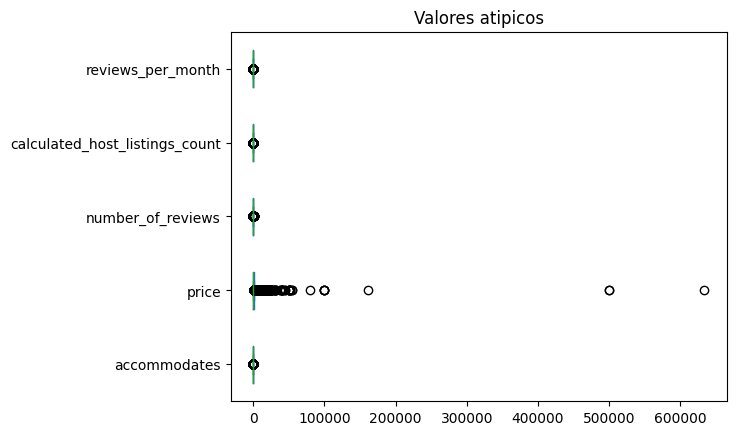

In [27]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [28]:
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido accommodates                         11.026495
price                             17492.868351
number_of_reviews                   154.562573
calculated_host_listings_count       81.197680
reviews_per_month                     4.208422
dtype: float64
Limite inferior permitido accommodates                         -2.996839
price                            -16030.491222
number_of_reviews                  -109.955257
calculated_host_listings_count      -63.055861
reviews_per_month                    -2.028960
dtype: float64


In [29]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]

In [30]:
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

accommodates                      644
price                              93
number_of_reviews                 811
calculated_host_listings_count    716
reviews_per_month                 650
dtype: int64

In [34]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

In [35]:
#Se juntan las columnas cualitativas con las cuantitativas
Rio_outliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
Rio_outliers.head()

,accommodates,price,number_of_reviews,calculated_host_listings_count,reviews_per_month,listing_url,last_scraped,source,name,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,bedrooms,beds,amenities,has_availability,review_scores_rating,instant_bookable
0,5.0,310.0,17.3,1.0,1.88,https://www.airbnb.com/rooms/17878,2024-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Brazil",within an hour,100%,100%,t,Copacabana,"['email', 'phone']",t,t,Copacabana,Entire condo,Entire home/apt,1 bath,2.0,2.0,"[""Smoking allowed"", ""Essentials"", ""Air conditi...",t,4.71,f
1,3.0,203.0,17.3,1.0,1.70,https://www.airbnb.com/rooms/25026,2024-06-28,city scrape,Beautiful Modern Decorated Studio in Copa,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, Brazil",within an hour,100%,82%,t,Copacabana,"['email', 'phone']",t,t,Copacabana,Entire rental unit,Entire home/apt,1 bath,1.0,2.0,"[""Fast wifi \u2013 501 Mbps"", ""Essentials"", ""H...",t,4.73,f
2,2.0,220.0,5.0,3.0,0.03,https://www.airbnb.com/rooms/220377,2024-06-27,city scrape,Suíte Casal (banheiro privativo),https://www.airbnb.com/users/show/1142424,Taciana,2011-09-11,SIN INFORMACIÓN,within an hour,100%,47%,f,Tijuca,['phone'],t,t,Tijuca,Private room in rental unit,Private room,1 private bath,1.0,1.0,"[""Essentials"", ""Air conditioning"", ""Hangers"", ...",t,5.0,f
3,2.0,201.0,17.3,1.0,2.85,https://www.airbnb.com/rooms/35764,2024-06-28,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,2010-06-27,"Rio de Janeiro, Brazil",within a few hours,100%,98%,t,Copacabana,"['email', 'phone']",t,t,Copacabana,Entire loft,Entire home/apt,1.5 baths,1.0,1.0,"[""Essentials"", ""Hangers"", ""Window AC unit"", ""B...",t,4.91,f
4,2.0,321.0,17.3,7.0,3.04,https://www.airbnb.com/rooms/223073,2024-06-28,city scrape,Modern Loft 1 • Ipanema Posto 9 • 500 mb,https://www.airbnb.com/users/show/503995,❤️ BrUx ❤️,2011-04-12,"Rio de Janeiro, Brazil",within an hour,100%,100%,t,Ipanema,"['email', 'phone']",t,t,Ipanema,Entire loft,Entire home/apt,1 bath,1.0,1.0,"[""Fast wifi \u2013 543 Mbps"", ""Essentials"", ""F...",t,4.81,t


In [36]:
#Comprobamos que no existan valores nulos
valores_nulos_Rio_outliers = Rio_outliers.isnull().sum()
valores_nulos_Rio_outliers

accommodates                      0
price                             0
number_of_reviews                 0
calculated_host_listings_count    0
reviews_per_month                 0
listing_url                       0
last_scraped                      0
source                            0
name                              0
host_url                          0
host_name                         0
host_since                        0
host_location                     0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_neighbourhood                0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
bathrooms_text                    0
bedrooms                          0
beds                              0
amenities                   

In [37]:
Rio_outliers.to_csv('Rio de Janeiro sin outliers.csv', index=False)